Preprocessing data

In [1]:
#manage datasets
import loompy 
import pandas as pd
import anndata
#usefull libraries
import numpy as np
#plot libraries
import seaborn as sns
from plotly.express import bar
from plotly.express import box
from matplotlib.pyplot import spy
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
ds = loompy.connect("CHLA9.loom", 'r+')

In [3]:
k=[]
for i in ds.ra.GeneType:
    k.append(i)
set(k)

{'IG_C_gene',
 'IG_C_pseudogene',
 'IG_D_gene',
 'IG_J_gene',
 'IG_J_pseudogene',
 'IG_V_gene',
 'IG_V_pseudogene',
 'IG_pseudogene',
 'Mt_rRNA',
 'Mt_tRNA',
 'TEC',
 'TR_C_gene',
 'TR_D_gene',
 'TR_J_gene',
 'TR_J_pseudogene',
 'TR_V_gene',
 'TR_V_pseudogene',
 'lncRNA',
 'miRNA',
 'misc_RNA',
 'polymorphic_pseudogene',
 'processed_pseudogene',
 'protein_coding',
 'pseudogene',
 'rRNA',
 'rRNA_pseudogene',
 'ribozyme',
 'sRNA',
 'scRNA',
 'scaRNA',
 'snRNA',
 'snoRNA',
 'transcribed_processed_pseudogene',
 'transcribed_unitary_pseudogene',
 'transcribed_unprocessed_pseudogene',
 'translated_processed_pseudogene',
 'translated_unprocessed_pseudogene',
 'unitary_pseudogene',
 'unprocessed_pseudogene',
 'vaultRNA'}

In [4]:
ds

,,,,,,,,,,,,,,,,,,,,,,,,,,,CellID,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAACAGCCTATA,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTCACGGAAGT,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAACGCTTCGTGTTCC,CHLA9_AAAGAACCACGGTGTC,...
,,,,,,,,,,,,,,,,,,,,,,,,,,,TotalUMIs,37599,34809,85843,48921,50375,77349,45112,53333,2675,31099,...
Accession,AccessionVersion,Aliases,CcdsID,Chromosome,ChromosomeEnd,ChromosomeStart,CosmicID,DnaBindingDomain,FullName,Gene,GeneType,HgncID,IsTF,Location,LocationSortable,LocusGroup,LocusType,MgdID,MirBaseID,OmimID,PubmedID,RefseqID,RgdID,UcscID,UniprotID,VegaID,,,,,,,,,,,,...
ENSG00000223972,ENSG00000223972.5,,,chr1,14409,11869,,,DEAD/H-box helicase 11 like 1,DDX11L1,transcribed_unprocessed_pseudogene,HGNC:37102,False,1p36.33,01p36.33,pseudogene,pseudogene,,,,19476624,NR_046018,,,,OTTHUMG00000000961,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000227232,ENSG00000227232.5,FAM39F,,chr1,29570,14404,,,"WASP family homolog 7, pseudogene",WASH7P,unprocessed_pseudogene,HGNC:38034,False,1p36.33,01p36.33,pseudogene,pseudogene,,,,18159949,NR_024540,,,,OTTHUMG00000000958,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000278267,ENSG00000278267.1,hsa-mir-6859-1,,chr1,17436,17369,,,microRNA 6859-1,MIR6859-1,miRNA,HGNC:50039,False,1p36.33,01p36.33,non-coding RNA,"RNA, micro",,MI0022705,,,NR_106918,,,,,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000243485,ENSG00000243485.5,,,chr1,31109,29554,,,MIR1302-2 host gene,MIR1302-2HG,lncRNA,HGNC:52482,False,1p36.33,01p36.33,non-coding RNA,"RNA, long non-coding",,,,,XR_001737835,,,,OTTHUMG00000000959,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000284332,ENSG00000284332.1,hsa-mir-1302-2,,chr1,30503,30366,,,microRNA 1302-2,MIR1302-2,miRNA,HGNC:35294,False,1p36.33,01p36.33,non-coding RNA,"RNA, micro",,MI0006363,,,NR_036051,,uc031tlb.1,,,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000237613,ENSG00000237613.2,F379,,chr1,36081,34554,,,family with sequence similarity 138 member A,FAM138A,lncRNA,HGNC:32334,False,1p36.33,01p36.33,non-coding RNA,"RNA, long non-coding",,,,"""11779631|15233989""",NR_026818,,uc001aak.4,,OTTHUMG00000000960,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000268020,ENSG00000268020.3,,,chr1,53312,52473,,,olfactory receptor family 4 subfamily G member 4 pseudogene,OR4G4P,unprocessed_pseudogene,HGNC:14822,False,1p36.33,01p36.33,pseudogene,pseudogene,,,,,NG_004148,,,,OTTHUMG00000185779,,0,0,0,0,0,0,0,0,0,0,...
ENSG00000240361,ENSG00000240361.2,,,chr1,64116,57598,,,olfactory receptor family 4 subfamily G member 11 pseudogene,OR4G11P,transcribed_unprocessed_pseudogene,HGNC:31276,False,1p36.33,01p36.33,pseudogene,pseudogene,,,,,NG_004423,,,,OTTHUMG00000001095,,0,0,0,0,0,0,0,0,0,0,...


In [5]:
print(ds.ca.keys())

['CellID', 'TotalUMIs']


In [6]:
print(ds.ra.keys())

['Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'Gene', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID']


In [7]:
A=ds[:,:]

In [8]:
At=np.transpose(A)

plot the sparsity of data

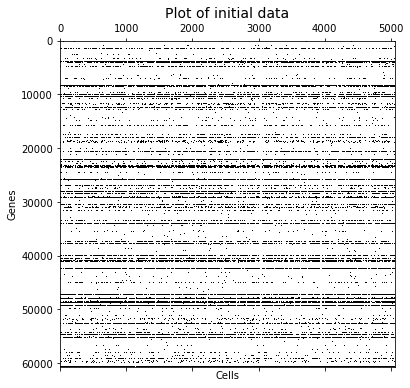

In [9]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
spy(A,aspect='auto')
ax.set_xlabel('Cells',size=10)
ax.set_ylabel('Genes',size=10)
ax.set_title('Plot of initial data',size=14)
plt.show()

In [10]:
df=pd.DataFrame(columns=ds.ca.CellID,index=ds.ra.AccessionVersion,data=A)
df2=pd.DataFrame(index=ds.ca.CellID,columns=ds.ra.AccessionVersion,data=At)

Accession version because is unique

In [11]:
df.index.unique()

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000284332.1', 'ENSG00000237613.2',
       'ENSG00000268020.3', 'ENSG00000240361.2', 'ENSG00000186092.6',
       'ENSG00000238009.6',
       ...
       'ENSG00000273739.1', 'ENSG00000276700.1', 'ENSG00000276312.1',
       'ENSG00000275757.1', 'ENSG00000278573.1', 'ENSG00000276017.1',
       'ENSG00000278817.1', 'ENSG00000277196.4', 'ENSG00000278625.1',
       'ENSG00000277374.1'],
      dtype='object', length=60662)

In [12]:
df['genetype']=ds.ra.GeneType

In [13]:
counter=df.groupby(by='genetype').count()
counter

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAACAGCCTATA,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTCACGGAAGT,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAACGCTTCGTGTTCC,CHLA9_AAAGAACCACGGTGTC,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
genetype,,,,,,,,,,,,,,,,,,,,,
IG_C_gene,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
IG_C_pseudogene,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
IG_D_gene,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
IG_J_gene,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
IG_J_pseudogene,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
IG_V_gene,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
IG_V_pseudogene,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
IG_pseudogene,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mt_rRNA,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [14]:
fig=bar(data_frame=counter, x=counter.index, y='CHLA9_AAACCCAGTTGTACGT',log_y=True,labels={ 
                  "CHLA9_AAACCCAGTTGTACGT": "number of genes"
            },width=800, height=600)
fig.update_layout(
    title={
        'text': "Total number of genes per gene type in logarithmic scale",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_size=12)

fig.write_html("genenumber.html")

Before focusing only on some particular types of gene we first focus on the TotalUMIs that is the sum of the columns to see if there are some irreasonable numbers

In [15]:
df2['Total']= df2.sum(axis=1)
df2

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000284332.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,...,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1,Total
CHLA9_AAACCCAGTTGTACGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37599
CHLA9_AAACGAAAGACCCGCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34809
CHLA9_AAACGAACAGCCTATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85843
CHLA9_AAACGAAGTGGCTAGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48921
CHLA9_AAACGAATCGAATCCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHLA9_TTTGTTGAGAACGCGT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20272
CHLA9_TTTGTTGAGATGCGAC,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60639
CHLA9_TTTGTTGAGGACATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37814
CHLA9_TTTGTTGCACCTCAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43410


Let's show an histogram with the distribution of the total number of genes per cell

In [16]:
fig=box(data_frame=df2, x='Total',labels={'Total':'TotalUMIs'})
fig.update_layout(
    title={
        'text': "Distribution of TotalUMIs number",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font_size=12)

fig.write_html("UMI_distr.html")

<AxesSubplot:xlabel='Total'>

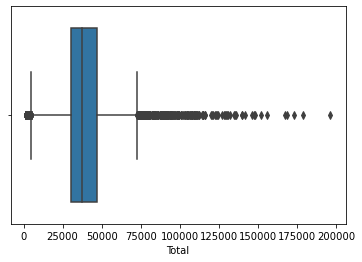

In [17]:
sns.boxplot(data=df2,x='Total')

In [18]:
q1 = df2['Total'].quantile(0.25)
q3 = df2['Total'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

In [19]:
colu=df2[(df2['Total']>fence_low)&(df2['Total']<fence_high)].index

I obtained the list of columns with my request now i will create the dataframe with only one genetype

only keeping protein_coding because is the major component

In [20]:
pc=df[df.genetype=='protein_coding'].drop('genetype',axis=1)
pc

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAACAGCCTATA,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTCACGGAAGT,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAACGCTTCGTGTTCC,CHLA9_AAAGAACCACGGTGTC,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
ENSG00000186092.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000284733.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000284662.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000187634.12,0,5,5,9,9,8,3,7,1,4,...,6,4,6,6,1,2,17,1,5,8
ENSG00000188976.11,3,1,5,2,6,11,5,9,0,2,...,2,2,2,5,0,1,5,8,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277836.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000278633.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000276017.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000278817.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pc=pc[colu]
pc

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAAGAACCACGGTGTC,CHLA9_AAAGAACCATCCTATT,CHLA9_AAAGAACGTCTGTTAG,CHLA9_AAAGAACGTGTGTACT,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
ENSG00000186092.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000284733.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000284662.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000187634.12,0,5,9,9,3,7,4,7,2,6,...,6,4,6,6,1,2,17,1,5,8
ENSG00000188976.11,3,1,2,6,5,9,2,0,1,4,...,2,2,2,5,0,1,5,8,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277836.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000278633.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000276017.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000278817.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we are going to delete all the rows that have a high number of zeros

We first vizualize them

In [22]:
med=(pc==0).sum(axis=1).median()
pc_new=pc[(pc==0).sum(axis=1)<med]

In [23]:
(pc_new==0).sum(axis=1)

ENSG00000187634.12     347
ENSG00000188976.11     323
ENSG00000187961.14    2180
ENSG00000188290.10     806
ENSG00000187608.10    1375
                      ... 
ENSG00000198786.2       18
ENSG00000198695.2        9
ENSG00000198727.2        4
ENSG00000276256.1     1291
ENSG00000273748.1     3711
Length: 10002, dtype: int64

In [24]:
pc_new['CHLA9_AAACCCAGTTGTACGT'].sum()

34731

In [25]:
pc_new

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAAGAACCACGGTGTC,CHLA9_AAAGAACCATCCTATT,CHLA9_AAAGAACGTCTGTTAG,CHLA9_AAAGAACGTGTGTACT,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
ENSG00000187634.12,0,5,9,9,3,7,4,7,2,6,...,6,4,6,6,1,2,17,1,5,8
ENSG00000188976.11,3,1,2,6,5,9,2,0,1,4,...,2,2,2,5,0,1,5,8,6,7
ENSG00000187961.14,1,1,1,0,2,1,1,0,2,1,...,1,1,0,0,0,0,1,1,2,2
ENSG00000188290.10,5,0,7,2,4,4,0,7,2,5,...,1,4,1,7,0,4,4,2,6,4
ENSG00000187608.10,0,2,2,3,3,0,1,2,4,3,...,1,1,3,1,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198786.2,16,12,13,18,17,24,10,20,12,6,...,12,9,21,29,7,7,23,26,5,46
ENSG00000198695.2,42,17,54,34,35,45,25,53,16,19,...,38,56,53,53,41,18,41,44,32,85
ENSG00000198727.2,202,196,325,282,251,208,119,236,104,175,...,226,210,268,241,174,96,261,277,173,420
ENSG00000276256.1,0,1,1,0,0,2,1,1,3,4,...,0,5,0,1,0,3,3,1,0,5


Now i normalize the columns

In [26]:
pc_norm=pc_new.div(pc_new.sum(axis=0), axis=1)
pc_norm

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAAGAACCACGGTGTC,CHLA9_AAAGAACCATCCTATT,CHLA9_AAAGAACGTCTGTTAG,CHLA9_AAAGAACGTGTGTACT,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
ENSG00000187634.12,0.000000,0.000157,0.000198,0.000196,0.000073,0.000146,0.000140,0.000179,0.000084,0.000189,...,0.000196,0.000114,0.000161,0.000139,0.000121,0.000109,0.000301,0.000029,0.000125,0.000145
ENSG00000188976.11,0.000086,0.000031,0.000044,0.000131,0.000121,0.000187,0.000070,0.000000,0.000042,0.000126,...,0.000065,0.000057,0.000054,0.000116,0.000000,0.000054,0.000089,0.000228,0.000150,0.000127
ENSG00000187961.14,0.000029,0.000031,0.000022,0.000000,0.000048,0.000021,0.000035,0.000000,0.000084,0.000032,...,0.000033,0.000029,0.000000,0.000000,0.000000,0.000000,0.000018,0.000029,0.000050,0.000036
ENSG00000188290.10,0.000144,0.000000,0.000154,0.000044,0.000097,0.000083,0.000000,0.000179,0.000084,0.000158,...,0.000033,0.000114,0.000027,0.000162,0.000000,0.000217,0.000071,0.000057,0.000150,0.000072
ENSG00000187608.10,0.000000,0.000063,0.000044,0.000065,0.000073,0.000000,0.000035,0.000051,0.000168,0.000095,...,0.000033,0.000029,0.000080,0.000023,0.000000,0.000054,0.000018,0.000029,0.000025,0.000072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198786.2,0.000461,0.000377,0.000286,0.000392,0.000411,0.000499,0.000350,0.000511,0.000503,0.000189,...,0.000393,0.000257,0.000562,0.000673,0.000847,0.000381,0.000408,0.000742,0.000125,0.000834
ENSG00000198695.2,0.001209,0.000533,0.001187,0.000740,0.000847,0.000937,0.000876,0.001355,0.000671,0.000600,...,0.001244,0.001600,0.001419,0.001229,0.004959,0.000979,0.000727,0.001256,0.000798,0.001541
ENSG00000198727.2,0.005816,0.006151,0.007143,0.006134,0.006075,0.004329,0.004168,0.006033,0.004359,0.005522,...,0.007399,0.006001,0.007177,0.005590,0.021045,0.005220,0.004627,0.007909,0.004316,0.007612
ENSG00000276256.1,0.000000,0.000031,0.000022,0.000000,0.000000,0.000042,0.000035,0.000026,0.000126,0.000126,...,0.000000,0.000143,0.000000,0.000023,0.000000,0.000163,0.000053,0.000029,0.000000,0.000091


and because the numbers are really small I apply the log to these numbers but before applying it we have to find a way to handle with the zeros so we can sum for a really small number

In [27]:
small=(pc_norm[pc_norm!=0].min()).min()
small

1.4885382554331646e-05

sum everything the minimum to have the zeros really near the ones.

In [28]:
pc_norm=pc_norm+small

In [29]:
pc_norm=pc_norm.apply(lambda x: np.log10(x))
pc_norm

,CHLA9_AAACCCAGTTGTACGT,CHLA9_AAACGAAAGACCCGCT,CHLA9_AAACGAAGTGGCTAGA,CHLA9_AAACGAATCGAATCCA,CHLA9_AAACGCTGTAGTACGG,CHLA9_AAACGCTTCATTACTC,CHLA9_AAAGAACCACGGTGTC,CHLA9_AAAGAACCATCCTATT,CHLA9_AAAGAACGTCTGTTAG,CHLA9_AAAGAACGTGTGTACT,...,CHLA9_TTTGGTTCATGTAACC,CHLA9_TTTGGTTTCATCACCC,CHLA9_TTTGGTTTCCAAGCTA,CHLA9_TTTGGTTTCGTGGGTC,CHLA9_TTTGGTTTCTGGGCAC,CHLA9_TTTGTTGAGAACGCGT,CHLA9_TTTGTTGAGATGCGAC,CHLA9_TTTGTTGAGGACATCG,CHLA9_TTTGTTGCACCTCAGG,CHLA9_TTTGTTGGTGAATTGA
ENSG00000187634.12,-4.827240,-3.764996,-3.672258,-3.676425,-4.058001,-3.794352,-3.809750,-3.712546,-4.005603,-3.689928,...,-3.675039,-3.888769,-3.755579,-3.812289,-3.866993,-3.907861,-3.499984,-4.362138,-3.855080,-3.796195
ENSG00000188976.11,-3.994547,-4.334731,-4.230317,-3.837437,-3.866759,-3.694248,-4.070949,-4.827240,-4.245638,-3.850472,...,-4.094923,-4.142438,-4.164671,-3.883158,-4.827240,-4.159519,-3.984980,-3.613858,-3.783686,-3.848449
ENSG00000187961.14,-4.359736,-4.334731,-4.433405,-4.827240,-4.198638,-4.447373,-4.301841,-4.827240,-4.005603,-4.333116,...,-4.322155,-4.361893,-4.827240,-4.827240,-4.827240,-4.827240,-4.486621,-4.362138,-4.188588,-4.291282
ENSG00000188290.10,-3.799016,-4.827240,-3.772804,-4.233661,-3.951937,-4.008197,-4.827240,-3.712546,-4.005603,-3.762824,...,-4.322155,-3.888769,-4.380237,-3.751378,-4.827240,-3.633796,-4.066552,-4.142733,-3.783686,-4.058565
ENSG00000187608.10,-4.827240,-4.109869,-4.230317,-4.096137,-4.058001,-4.827240,-4.301841,-4.180346,-3.738616,-3.960402,...,-4.322155,-4.361893,-4.021264,-4.419276,-4.827240,-4.159519,-4.486621,-4.362138,-4.399784,-4.058565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198786.2,-3.322787,-3.407310,-3.522012,-3.391016,-3.370225,-3.288737,-3.437589,-3.278851,-3.285769,-3.689928,...,-3.389580,-3.565316,-3.238644,-3.162665,-3.064733,-3.402847,-3.374070,-3.120770,-3.855080,-3.071283
ENSG00000198695.2,-2.912155,-3.260927,-2.920204,-3.122360,-3.064475,-3.021641,-3.050405,-2.863322,-3.163962,-3.211545,...,-2.899963,-2.791785,-2.843402,-2.905065,-2.303315,-3.002777,-3.129783,-2.895797,-3.089840,-2.808132
ENSG00000198727.2,-2.234256,-2.210022,-2.145224,-2.211192,-2.215371,-2.362148,-2.378572,-2.218361,-2.359102,-2.256742,...,-2.129930,-2.220698,-2.143175,-2.251396,-1.676544,-2.281097,-2.333336,-2.101069,-2.363473,-2.117629
ENSG00000276256.1,-4.827240,-4.334731,-4.433405,-4.827240,-4.827240,-4.247891,-4.301841,-4.393070,-3.851908,-3.850472,...,-4.827240,-3.801984,-4.827240,-4.419276,-4.827240,-3.749559,-4.167073,-4.362138,-4.827240,-3.976709


subplots of the two plotly plots

the boxplot represents the distribution of TotalUMIs number

The barplot represents the number of genes per genetype

In [30]:
fig = make_subplots(rows=2, cols=1,subplot_titles=("UMIs distribution","Number of genes for type in log scale"))
fig.add_trace(
    go.Box(x=df2['Total'],name='UMIs'),
    row=1,col=1)
fig.add_trace(go.Bar(x=counter.index, y=counter.CHLA9_AAACCCAGTTGTACGT),
             row=2, col=1)
fig.update_xaxes(title_text='Gene type',row=2,col=1)
fig.update_xaxes(title_text='TotalUMIs',row=1,col=1)
fig.update_yaxes(title_text='',row=1,col=1)
fig.update_yaxes(title_text='Number of genes',type="log",row=2,col=1)
fig.update_layout(height=700, showlegend=False)
fig.write_html("subplots.html")